In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

monopoly

In [2]:
class Monopoly:
    def __init__(self,beta, v):
        self.beta=beta
        self.v=v        
    def separateBands(self):
        x=1/(4+2*self.beta+2*self.v)
        pd=1-2*x
        latency=(self.beta/1+self.v/1)*x
        marketPrice=pd-latency
        profit=marketPrice*2*x
        surplus=0.5*((1-pd)**2)  
        return pd,latency,marketPrice,profit,surplus,x
    def pooledBands(self):
        x=2/(4+2*self.beta+self.v)
        pd=1-x
        latency=self.beta*x/2+x*self.v/4
        marketPrice =pd-latency
        profit=x*pd-x*latency
        surplus=0.5*((1-pd)**2)
        return pd,latency,marketPrice,profit,surplus,x



In [3]:
#consumer surplus is wrong.

class Cournot:
    def __init__(self,t = None):
        self.t=t
    def setup1(self):
        x_p=-(self.t**3-3.5*self.t**2+2*self.t+2)/(self.t**3+2.5*self.t**2-16*self.t-12)
        x_s=(self.t**2*(1-3*x_p)/(self.t**2+self.t+0.5))/3
        pd=1-2*(x_p+x_s)
        l_p=x_p*(1/(1-self.t/2)+(0.5/((1-self.t/2)**2)))
        l_s=2*x_s/self.t+0.5*2*x_s/self.t**2
        totalLatency=2*(x_p*l_p+x_s*l_s) #latency for 2 SP
        profit=2*((x_p+x_s)*pd)-totalLatency #multiply with 2
        surplus=0.5*((1-pd)**2)
        return pd,totalLatency,profit,surplus
    def meanOnly(self):
        x_p=(2-self.t)/(self.t+10)
        x_s=((3*self.t-10)*x_p+2-self.t)/(6-3*self.t)
        pd=1-2*(x_p+x_s)
        l_p=x_p*1/(1-self.t/2)
        l_s=2*x_s/self.t
        totalLatency=2*(x_p*l_p+x_s*l_s)
        profit=2*(x_p+x_s)*pd-totalLatency
        surplus=0.5*((1-pd)**2)
        return pd,totalLatency,profit,surplus
    def varianceOnly(self):
        x_p=(4+self.t**2-4*self.t)/(11*self.t**2-12*self.t+16)
        x_s=(self.t**2-3*(self.t**2)*x_p)/(3*self.t**2+1.5)
        pd=1-2*(x_p+x_s)
        l_p=x_p*0.5/((1-self.t/2)**2)
        l_s=0.5*2*x_s/(self.t**2)
        totalLatency=2*(x_p*l_p+x_s*l_s)
        profit=2*(x_p+x_s)*pd-totalLatency
        surplus=0.5*((1-pd)**2)
        return pd,totalLatency,profit,surplus


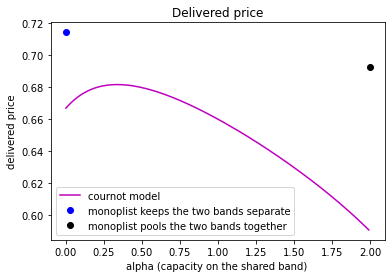

In [4]:
monopoly=Monopoly(1,0.5)
pd_a,latency_a,marketPrice_a,profit_a,surplus_a,x_a=monopoly.separateBands()
pd_b,latency_b,marketPrice_b,profit_b,surplus_b,x_b=monopoly.pooledBands()
k = np.arange(0.001, 1.999, 0.01)
cournot_1=Cournot(k)
pd1,totalLatency1,profit1,surplus1=cournot_1.setup1()
plt.plot(k,pd1,'m',0,pd_a,'bo',2,pd_b,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('delivered price')
plt.title('Delivered price')
#plt.savefig('Delivered price setup1.pdf')
plt.show()


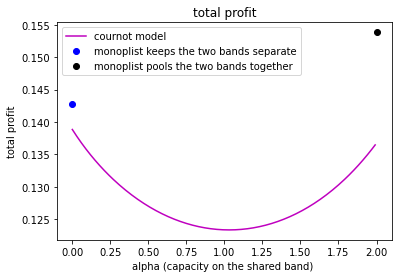

In [5]:
plt.plot(k,profit1,'m',0,profit_a,'bo',2,profit_b,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total profit')
plt.title('total profit')
#plt.savefig('total profit setup 1.pdf')
plt.show()

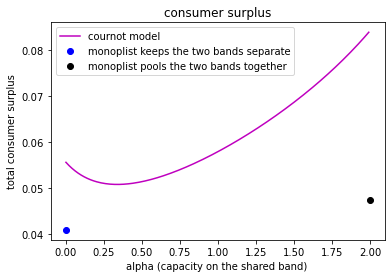

In [6]:
plt.plot(k,surplus1,'m',0,surplus_a,'bo',2,surplus_b,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total consumer surplus')
plt.title('consumer surplus')
plt.savefig('consumer surplus setup1.pdf')
plt.show()

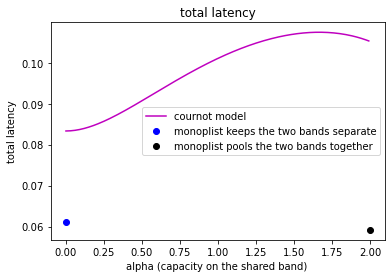

In [7]:
plt.plot(k,totalLatency1,'m',0,2*latency_a*x_a,'bo',2,latency_b*x_b,'ko')

plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total latency')
plt.title('total latency')
plt.savefig('total latency setup1.pdf')
plt.show()

0


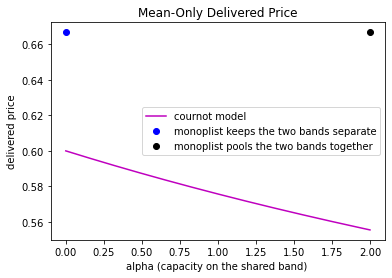

In [8]:
monopoly_meanOnly=Monopoly(beta=1,v=0)
print(monopoly_meanOnly.v)
pd_a_meanOnly,latency_a_meanOnly,marketPrice_a_meanOnly,profit_a_meanOnly,surplus_a_meanOnly,x_a_meanOnly=monopoly_meanOnly.separateBands()
pd_b_meanOnly,latency_b_meanOnly,marketPrice_b_meanOnly,profit_b_meanOnly,surplus_b_meanOnly,x_b_meanOnly=monopoly_meanOnly.pooledBands()
# evenly sampled time at 200ms intervals
k = np.arange(0.0001, 1.999, 0.0001)
cournot_meanOnly=Cournot(k)
pd_meanOnly,totalLatency_meanOnly,profit_meanOnly,surplus_meanOnly=cournot_meanOnly.meanOnly()
plt.plot(k,pd_meanOnly,'m',0,pd_a_meanOnly,'bo',2,pd_b_meanOnly,'ko')

plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('delivered price')
plt.title('Mean-Only Delivered Price')
#plt.savefig('Delivered price setup2.pdf')
plt.show()

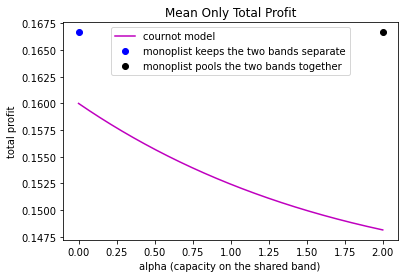

In [9]:

plt.plot(k,profit_meanOnly,'m',0,profit_a_meanOnly,'bo',2,profit_b_meanOnly,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total profit')
plt.title('Mean Only Total Profit')
plt.savefig('total profit setup 2.pdf')
plt.show()

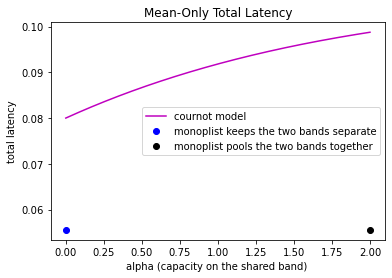

In [10]:

plt.plot(k,totalLatency_meanOnly,'m',0,2*latency_a_meanOnly*x_a_meanOnly,'bo',2,latency_b_meanOnly*x_b_meanOnly,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total latency')
plt.title('Mean-Only Total Latency')
#plt.savefig('total latency setup 2.pdf')

plt.show()

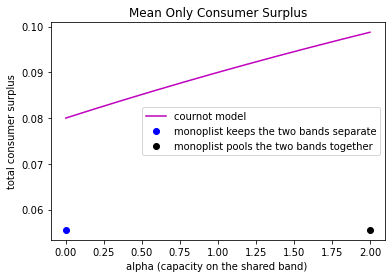

In [11]:

plt.plot(k,surplus_meanOnly,'m',surplus_a_meanOnly,'bo',2,surplus_b_meanOnly,'ko')

plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total consumer surplus')
plt.title('Mean Only Consumer Surplus')
#plt.savefig('consumer surplus setup 2.pdf')
plt.show()

Variance Only

0.5


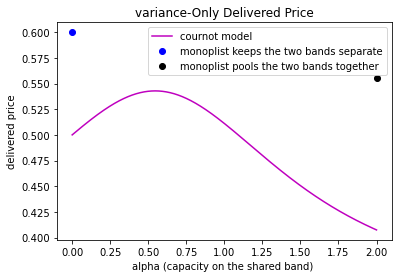

In [13]:
monopoly_varianceOnly=Monopoly(beta=0,v=0.5)
print(monopoly_varianceOnly.v)
pd_a_varianceOnly,latency_a_varianceOnly,marketPrice_a_varianceOnly,profit_a_varianceOnly,surplus_a_varianceOnly,x_a_varianceOnly=monopoly_varianceOnly.separateBands()
pd_b_varianceOnly,latency_b_varianceOnly,marketPrice_b_varianceOnly,profit_b_varianceOnly,surplus_b_varianceOnly,x_b_varianceOnly=monopoly_varianceOnly.pooledBands()
k = np.arange(0.0001, 2, 0.0001)
cournot_varianceOnly=Cournot(k)
pd_varianceOnly,totalLatency_varianceOnly,profit_varianceOnly,surplus_varianceOnly=cournot_varianceOnly.varianceOnly()
plt.plot(k,pd_varianceOnly,'m',0,pd_a_varianceOnly,'bo',2,pd_b_varianceOnly,'ko')

plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('delivered price')
plt.title('variance-Only Delivered Price')
plt.savefig('Delivered price variance only.pdf')
plt.show()

In [14]:
print(x_a_varianceOnly,x_b_varianceOnly)

0.2 0.4444444444444444


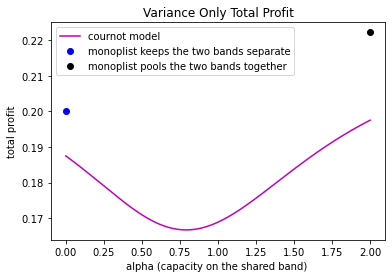

In [15]:
plt.plot(k,profit_varianceOnly,'m',0,profit_a_varianceOnly,'bo',2,profit_b_varianceOnly,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total profit')
plt.title('Variance Only Total Profit')
plt.savefig('total profit variance only.pdf')
plt.show()

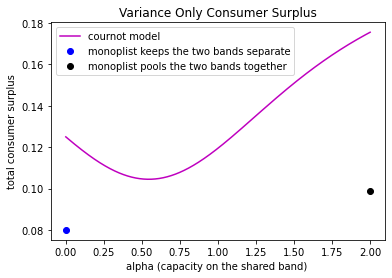

In [16]:
plt.plot(k,surplus_varianceOnly,'m',0,surplus_a_varianceOnly,'bo',2,surplus_b_varianceOnly,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total consumer surplus')
plt.title('Variance Only Consumer Surplus')
plt.savefig('consumer surplus variance only.pdf')
plt.show()

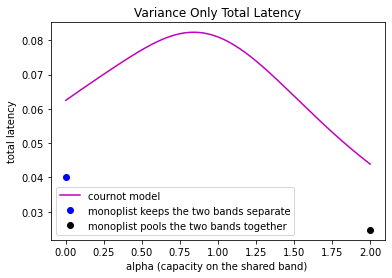

In [17]:

plt.plot(k,totalLatency_varianceOnly,'m',0,2*latency_a_varianceOnly*x_a_varianceOnly,'bo',2,latency_b_varianceOnly*x_b_varianceOnly,'ko')
plt.legend(['cournot model', 'monoplist keeps the two bands separate','monoplist pools the two bands together'])
plt.xlabel('alpha (capacity on the shared band) ')
plt.ylabel('total latency')
plt.title('Variance Only Total Latency')
plt.savefig('total latency variance only.pdf')
plt.show()

In [ ]:
a,b,c,x,y,z,q = symbols('a b c,x,y,z,q')
linsolve(Matrix(( [a, 1, 2, 1, 1], [2, 1, 2*b, b, 1], [1, c, 1, 2, 1], [1,2,b,2*b, 1])), (x, y, z,q))

In [18]:
class Cournot_Model:
    def __init__(self,beta=None, alpha = None, v = None):
        self.beta = beta
        self.alpha = alpha
        self.v = v

    def varianceOnly(self):
        self.beta = 0
        pd,latency1,latency2,totalLatency,p1,p2,totalProfit,totalCS,C1,C2,v,alpha,beta=self.generalSolve()
        pd_varianceOnly = pd.subs([(C1, 1), (C2, 1), (v, 0.5),(beta,0)])
        totalProfit_varianceOnly=totalProfit.subs([(C1, 1), (C2, 1), (v, 0.5),(beta,0)])
        figProfit_varianceOnly=self.plot(totalProfit_varianceOnly,alpha)
        return pd_varianceOnly,figProfit_varianceOnly

    def varianceOnlyDerivativeAlpha(self):
        pd,latency1,latency2,totalLatency,p1,p2,totalProfit,totalCS,C1,C2,v,alpha,beta=self.generalSolve()
        totalProfit = totalProfit.subs([(C1, 1), (C2, 1), (v, 0.5),(beta,0)])
        latency1= latency1.subs([(C1, 1), (C2, 1), (v, 0.5),(beta,0)])
        diProfit=diff(totalProfit,alpha)
        figDiProfit = self.plot(diProfit,alpha)
        diSp1Latency=diff(latency1,alpha)
        figDiSp1Latency = self.plot(diSp1Latency,alpha)
        return figDiProfit,figDiSp1Latency

    def varianceOnlyDerivativeV(self):
        pd,latency1,latency2,totalLatency,p1,p2,totalProfit,totalCS,C1,C2,v,alpha,beta=self.generalSolve()
        totalProfit05 = totalProfit.subs([(C1, 1), (C2, 1), (alpha, 0.5),(beta,0)])
        totalProfit075 = totalProfit.subs([(C1, 1), (C2, 1), (alpha, 0.75),(beta,0)])
        diProfit05 = diff(totalProfit05,v)
        diProfit075 = diff(totalProfit075,v)
        return self.plot(diProfit05,v),self.plot(diProfit075,v)
        
    def generalSolve(self):
        a,b,c,x,y,z,q,beta,C1,C2,v ,alpha = symbols('a b c,x,y,z,q,beta,C1,C2,v,alpha')
        X=linsolve(Matrix(( [a, 1, 2, 1, 1], [2, 1, 2*b, b, 1], [1, c, 1, 2, 1], [1,2,b,2*b, 1])), (x, y, z,q))
        A=2*((1+beta*1/(C1-0.5*alpha)+v/((C1-0.5*alpha)**2)))
        B=1+beta*1/alpha+v/(alpha**2)
        C=2*((1+beta*1/(C2-0.5*alpha)+v/((C2-0.5*alpha)**2)))
        Y=X.subs([(a, A), (b, B), (c, C)])
        xp1=Y.args[0][0]
        xp2=Y.args[0][1]
        xs1=Y.args[0][2]
        xs2=Y.args[0][3]
        pd = self.deliverPrice(xp1,xp2,xs1,xs2)
        latency1=self.oneSPLatency(xp1,xs1,xs2,beta,C1,v ,alpha)
        latency2=self.oneSPLatency(xp2,xs2,xs1,beta,C2,v ,alpha)
        totalLatency=latency1+latency2
        p1=self.oneSpProfit(pd,xp1,xs1,latency1)
        p2=self.oneSpProfit(pd,xp2,xs2,latency2)
        totalProfit=p1+p2
        totalCS=self.totalConsumerSurplus(pd)
        return pd,latency1,latency2,totalLatency,p1,p2,totalProfit,totalCS,C1,C2,v,alpha,beta

    def deliverPrice(self,xp1,xp2,xs1,xs2):
        return (1-(xp1+xp2+xs1+xs2))
    
    def oneSPLatency(self,xp_i,xs_i,xs_j,beta,C,v ,alpha):
        l_p=xp_i*v/((C-alpha/2)**2)+xp_i*beta/(C-alpha/2)
        l_s=v*(xs_i+xs_j)/(alpha**2)+beta*(xs_i+xs_j)/alpha
        return(xp_i*l_p+xs_i*l_s)
    
    def oneSpProfit(self,pd,xp_i,xs_i,latency_i):
        return((xp_i+xs_i)*pd-latency_i)
        
    def totalConsumerSurplus(self,pd):
        return(0.5*((1-pd)**2))
    
    def plot(self,exp,Arg):
        k=np.arange(0.01,2,0.05)
        fig=[]
        for i in k:    
            fig.append(exp.subs(Arg,i))
        return fig

Cour=Cournot_Model()
        


In [19]:

figDiprofit,figDiSp1Latency=Cour.varianceOnlyDerivativeAlpha()
figDiProfit05,figDiProfit075=Cour.varianceOnlyDerivativeV()
k = np.arange(0.01, 2.0, 0.05)


Derivative of Profit vs $\alpha$

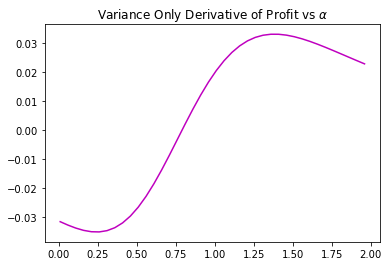

In [20]:
plt.plot(k,figDiprofit,'m')
plt.title(r'Variance Only Derivative of Profit vs $\alpha$')
plt.savefig('Variance Only Derivative of Profit vs alpha.pdf')


Derivative of SP 1 Latency vs $\alpha$

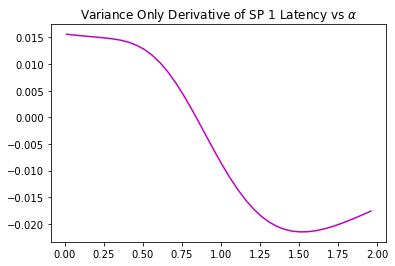

In [21]:
plt.plot(k,figDiSp1Latency,'m')
plt.title(r'Variance Only Derivative of SP 1 Latency vs $\alpha$')
plt.savefig('Variance Only Derivative of SP 1 Latency vs alpha.pdf')

Profit vs Variance at $\alpha = 0.5$

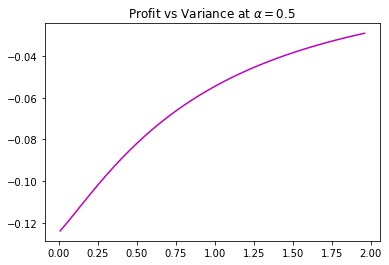

In [22]:
plt.plot(k,figDiProfit05,'m')
plt.title(r'Profit vs Variance at $\alpha = 0.5$')
plt.savefig('Profit vs Variance at alpha05.pdf')

Profit vs Variance at $\alpha=0.75$

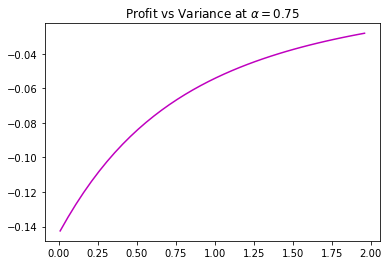

In [23]:
plt.plot(k,figDiProfit075,'m')
plt.title(r'Profit vs Variance at $\alpha = 0.75$')
plt.savefig('Profit vs Variance at alpha075.pdf')

In [24]:
a,b,c,x,y,z,q,beta,C1,C2,v ,alpha = symbols('a b c,x,y,z,q,beta,C1,C2,v,alpha')

X=linsolve(Matrix(( [a, 1, 2, 1, 1], [2, 1, 2*b, b, 1], [1, c, 1, 2, 1], [1,2,b,2*b, 1])), (x, y, z,q))
A=2*((1+beta*1/(C1-0.5*alpha)+v/((C1-0.5*alpha)**2)))
B=1+beta*1/alpha+v/(alpha**2)
C=2*((1+beta*1/(C2-0.5*alpha)+v/((C2-0.5*alpha)**2)))
Y=X.subs([(a, A), (b, B), (c, C)])
#variance only
M=Y.subs([(C1, 1), (C2, 1), (alpha, 0.75),(beta,0)])
xp=M.args[0][0]
xs=M.args[0][2]
pd=1-2*(xp+xs)
l_p=xp*v/((C1-alpha/2)**2)+xp*beta/(C1-alpha/2)
l_s=v*2*xs/(alpha**2)+beta*2*xs/alpha
latency=xp*l_p+xs*l_s
#latency=latency.subs([(C1,1),(v,0.5),(beta,0)])
dilatency = diff(latency,alpha)
pi=(xp+xs)*pd-latency
pi_alpha=pi.subs([(C1,1),(v,0.5),(beta,0)])

dipi_alpha=diff(pi_alpha,alpha)
pi_v_alpha05=pi.subs([(C1,1),(alpha,0.5),(beta,0)])
dipi_v_alpha05=diff(pi_v_alpha05,v)
pi_v_alpha075=pi.subs([(C1,1),(alpha,0.75),(beta,0)])
dipi_v_alpha075=diff(pi_v_alpha075,v)
#print(dipi_v_alpha05)
k = np.arange(0.01, 2.0, 0.1)
res_exp=[];
m=0

for i in k:
    m=m+1
    
    if m%10==0:
        print(i)
    
    res_exp.append(dipi_v_alpha075.subs(v,i)*2)



0.91
1.9100000000000001


In [ ]:
#print(res_exp)
plt.plot(k,res_exp,'m')

In [ ]:
a,b,c,x,y,z,q,beta,C1,C2,v ,alpha = symbols('a b c,x,y,z,q,beta,C1,C2,v,alpha')

X=linsolve(Matrix(( [a, 1, 2, 1, 1], [2, 1, 2*b, b, 1], [1, c, 1, 2, 1], [1,2,b,2*b, 1])), (x, y, z,q))
A=2*((1+beta*1/(C1-0.5*alpha)+v/((C1-0.5*alpha)**2)))
B=1+beta*1/alpha+v/(alpha**2)
C=2*((1+beta*1/(C2-0.5*alpha)+v/((C2-0.5*alpha)**2)))
Y=X.subs([(a, A), (b, B), (c, C)])
#variance only
M=Y.subs([(C1, 1), (C2, 1), (alpha, 0.75),(beta,0)])
xp=M.args[0][0]
xs=M.args[0][2]